In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import itertools
import solar_sensor_env
import simple_solar_env

In [2]:
import gym
from gym.envs.registration import registry, register, make, spec
solarfname = 'testing'
solarrecord = solar_sensor_env.get_generated_power(solarfname)
#solarrecord = simple_solar_env.emulate_solar_ts(365)
register(
    id='SolarSensor-v0',
    entry_point='solar_sensor_env:SolarSensorEnv',
    kwargs = {'max_batt':100,'num_sensors':1, 'solarpowerrecord':solarrecord}
    )

In [3]:
env = gym.make('SolarSensor-v0')

In [4]:
def wrap_action(num):
    return (0,num)
class SimpleAgent(object):
    """The world's simplest agent!"""
    def __init__(self, env,n_episodes=10, max_env_steps = int(30*24/0.5)):
        self.env = env
        self.n_episodes = n_episodes
        if max_env_steps is not None: self.env._max_episode_steps = max_env_steps
        self.full_record = []
    def act(self, observation):
        #recharge if battery gets below 3 
        # status 0: On 1: PreSleep 2: Sleep
        print(observation)
        status, battery, diff = observation['S0']
        if battery<3:
            return wrap_action(1)#go to sleep
        elif battery>self.env.max_batt-2:
            print('maxed', self.env.max_batt, battery)
            return wrap_action(0)#wakeup
        else:
            act = 0 if status==0 else 1
            return wrap_action(act)
    def run(self, render=True):
        for e in range(self.n_episodes):
            print('#######New episode#############')
            done=False
            observation = self.env.reset()
            reward_sum = 0
            i=0
            while not done and i<self.env._max_episode_steps:
                if render: self.env.render()
                action = agent.act(observation)
                print('observation:{}, action:{}'.format(observation, action))
                observation, reward, done, info = self.env.step(action)
                print('new observation:{}, reward:{}'.format(observation, reward))
                reward_sum += reward
                i+=1
            print("episode: {}/{}, score: {}".format(e, self.n_episodes, reward_sum))
            self.full_record.append(self.env.record)
        return e

In [5]:
agent = SimpleAgent(env)

In [6]:
agent.run()

#######New episode#############
{'S0': (0, 100, 0)}
maxed 100 100
observation:{'S0': (0, 100, 0)}, action:(0, 0)
new observation:{'S0': (0, 97, -3)}, reward:1
{'S0': (0, 97, -3)}
observation:{'S0': (0, 97, -3)}, action:(0, 0)
new observation:{'S0': (0, 94, -3)}, reward:1
{'S0': (0, 94, -3)}
observation:{'S0': (0, 94, -3)}, action:(0, 0)
new observation:{'S0': (0, 91, -3)}, reward:1
{'S0': (0, 91, -3)}
observation:{'S0': (0, 91, -3)}, action:(0, 0)
new observation:{'S0': (0, 88, -3)}, reward:1
{'S0': (0, 88, -3)}
observation:{'S0': (0, 88, -3)}, action:(0, 0)
new observation:{'S0': (0, 85, -3)}, reward:1
{'S0': (0, 85, -3)}
observation:{'S0': (0, 85, -3)}, action:(0, 0)
new observation:{'S0': (0, 82, -3)}, reward:1
{'S0': (0, 82, -3)}
observation:{'S0': (0, 82, -3)}, action:(0, 0)
new observation:{'S0': (0, 79, -3)}, reward:1
{'S0': (0, 79, -3)}
observation:{'S0': (0, 79, -3)}, action:(0, 0)
new observation:{'S0': (0, 75, -4)}, reward:1
{'S0': (0, 75, -4)}
observation:{'S0': (0, 75, -4)

{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': 

new observation:{'S0': (2, 13, 3)}, reward:0
{'S0': (2, 13, 3)}
observation:{'S0': (2, 13, 3)}, action:(0, 1)
new observation:{'S0': (2, 17, 4)}, reward:0
{'S0': (2, 17, 4)}
observation:{'S0': (2, 17, 4)}, action:(0, 1)
new observation:{'S0': (2, 24, 7)}, reward:0
{'S0': (2, 24, 7)}
observation:{'S0': (2, 24, 7)}, action:(0, 1)
new observation:{'S0': (2, 28, 4)}, reward:0
{'S0': (2, 28, 4)}
observation:{'S0': (2, 28, 4)}, action:(0, 1)
new observation:{'S0': (2, 33, 5)}, reward:0
{'S0': (2, 33, 5)}
observation:{'S0': (2, 33, 5)}, action:(0, 1)
new observation:{'S0': (2, 35, 2)}, reward:0
{'S0': (2, 35, 2)}
observation:{'S0': (2, 35, 2)}, action:(0, 1)
new observation:{'S0': (2, 39, 4)}, reward:0
{'S0': (2, 39, 4)}
observation:{'S0': (2, 39, 4)}, action:(0, 1)
new observation:{'S0': (2, 43, 4)}, reward:0
{'S0': (2, 43, 4)}
observation:{'S0': (2, 43, 4)}, action:(0, 1)
new observation:{'S0': (2, 50, 7)}, reward:0
{'S0': (2, 50, 7)}
observation:{'S0': (2, 50, 7)}, action:(0, 1)
new observ

{'S0': (0, 42, -3)}
observation:{'S0': (0, 42, -3)}, action:(0, 0)
new observation:{'S0': (0, 39, -3)}, reward:1
{'S0': (0, 39, -3)}
observation:{'S0': (0, 39, -3)}, action:(0, 0)
new observation:{'S0': (0, 36, -3)}, reward:1
{'S0': (0, 36, -3)}
observation:{'S0': (0, 36, -3)}, action:(0, 0)
new observation:{'S0': (0, 33, -3)}, reward:1
{'S0': (0, 33, -3)}
observation:{'S0': (0, 33, -3)}, action:(0, 0)
new observation:{'S0': (0, 30, -3)}, reward:1
{'S0': (0, 30, -3)}
observation:{'S0': (0, 30, -3)}, action:(0, 0)
new observation:{'S0': (0, 27, -3)}, reward:1
{'S0': (0, 27, -3)}
observation:{'S0': (0, 27, -3)}, action:(0, 0)
new observation:{'S0': (0, 24, -3)}, reward:1
{'S0': (0, 24, -3)}
observation:{'S0': (0, 24, -3)}, action:(0, 0)
new observation:{'S0': (0, 21, -3)}, reward:1
{'S0': (0, 21, -3)}
observation:{'S0': (0, 21, -3)}, action:(0, 0)
new observation:{'S0': (0, 18, -3)}, reward:1
{'S0': (0, 18, -3)}
observation:{'S0': (0, 18, -3)}, action:(0, 0)
new observation:{'S0': (0, 15

new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, re

new observation:{'S0': (2, 38, -1)}, reward:0
{'S0': (2, 38, -1)}
observation:{'S0': (2, 38, -1)}, action:(0, 1)
new observation:{'S0': (2, 37, -1)}, reward:0
{'S0': (2, 37, -1)}
observation:{'S0': (2, 37, -1)}, action:(0, 1)
new observation:{'S0': (2, 36, -1)}, reward:0
{'S0': (2, 36, -1)}
observation:{'S0': (2, 36, -1)}, action:(0, 1)
new observation:{'S0': (2, 35, -1)}, reward:0
{'S0': (2, 35, -1)}
observation:{'S0': (2, 35, -1)}, action:(0, 1)
new observation:{'S0': (2, 34, -1)}, reward:0
{'S0': (2, 34, -1)}
observation:{'S0': (2, 34, -1)}, action:(0, 1)
new observation:{'S0': (2, 33, -1)}, reward:0
{'S0': (2, 33, -1)}
observation:{'S0': (2, 33, -1)}, action:(0, 1)
new observation:{'S0': (2, 32, -1)}, reward:0
{'S0': (2, 32, -1)}
observation:{'S0': (2, 32, -1)}, action:(0, 1)
new observation:{'S0': (2, 32, 0)}, reward:0
{'S0': (2, 32, 0)}
observation:{'S0': (2, 32, 0)}, action:(0, 1)
new observation:{'S0': (2, 32, 0)}, reward:0
{'S0': (2, 32, 0)}
observation:{'S0': (2, 32, 0)}, act

observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action

observation:{'S0': (2, 16, 3)}, action:(0, 1)
new observation:{'S0': (2, 17, 1)}, reward:0
{'S0': (2, 17, 1)}
observation:{'S0': (2, 17, 1)}, action:(0, 1)
new observation:{'S0': (2, 17, 0)}, reward:0
{'S0': (2, 17, 0)}
observation:{'S0': (2, 17, 0)}, action:(0, 1)
new observation:{'S0': (2, 18, 1)}, reward:0
{'S0': (2, 18, 1)}
observation:{'S0': (2, 18, 1)}, action:(0, 1)
new observation:{'S0': (2, 18, 0)}, reward:0
{'S0': (2, 18, 0)}
observation:{'S0': (2, 18, 0)}, action:(0, 1)
new observation:{'S0': (2, 18, 0)}, reward:0
{'S0': (2, 18, 0)}
observation:{'S0': (2, 18, 0)}, action:(0, 1)
new observation:{'S0': (2, 18, 0)}, reward:0
{'S0': (2, 18, 0)}
observation:{'S0': (2, 18, 0)}, action:(0, 1)
new observation:{'S0': (2, 17, -1)}, reward:0
{'S0': (2, 17, -1)}
observation:{'S0': (2, 17, -1)}, action:(0, 1)
new observation:{'S0': (2, 16, -1)}, reward:0
{'S0': (2, 16, -1)}
observation:{'S0': (2, 16, -1)}, action:(0, 1)
new observation:{'S0': (2, 15, -1)}, reward:0
{'S0': (2, 15, -1)}
ob

{'S0': (0, 100, 0)}
maxed 100 100
observation:{'S0': (0, 100, 0)}, action:(0, 0)
new observation:{'S0': (0, 96, -4)}, reward:1
{'S0': (0, 96, -4)}
observation:{'S0': (0, 96, -4)}, action:(0, 0)
new observation:{'S0': (0, 91, -5)}, reward:1
{'S0': (0, 91, -5)}
observation:{'S0': (0, 91, -5)}, action:(0, 0)
new observation:{'S0': (0, 87, -4)}, reward:1
{'S0': (0, 87, -4)}
observation:{'S0': (0, 87, -4)}, action:(0, 0)
new observation:{'S0': (0, 83, -4)}, reward:1
{'S0': (0, 83, -4)}
observation:{'S0': (0, 83, -4)}, action:(0, 0)
new observation:{'S0': (0, 79, -4)}, reward:1
{'S0': (0, 79, -4)}
observation:{'S0': (0, 79, -4)}, action:(0, 0)
new observation:{'S0': (0, 75, -4)}, reward:1
{'S0': (0, 75, -4)}
observation:{'S0': (0, 75, -4)}, action:(0, 0)
new observation:{'S0': (0, 72, -3)}, reward:1
{'S0': (0, 72, -3)}
observation:{'S0': (0, 72, -3)}, action:(0, 0)
new observation:{'S0': (0, 69, -3)}, reward:1
{'S0': (0, 69, -3)}
observation:{'S0': (0, 69, -3)}, action:(0, 0)
new observation

new observation:{'S0': (0, 82, -3)}, reward:1
{'S0': (0, 82, -3)}
observation:{'S0': (0, 82, -3)}, action:(0, 0)
new observation:{'S0': (0, 79, -3)}, reward:1
{'S0': (0, 79, -3)}
observation:{'S0': (0, 79, -3)}, action:(0, 0)
new observation:{'S0': (0, 76, -3)}, reward:1
{'S0': (0, 76, -3)}
observation:{'S0': (0, 76, -3)}, action:(0, 0)
new observation:{'S0': (0, 73, -3)}, reward:1
{'S0': (0, 73, -3)}
observation:{'S0': (0, 73, -3)}, action:(0, 0)
new observation:{'S0': (0, 70, -3)}, reward:1
{'S0': (0, 70, -3)}
observation:{'S0': (0, 70, -3)}, action:(0, 0)
new observation:{'S0': (0, 67, -3)}, reward:1
{'S0': (0, 67, -3)}
observation:{'S0': (0, 67, -3)}, action:(0, 0)
new observation:{'S0': (0, 64, -3)}, reward:1
{'S0': (0, 64, -3)}
observation:{'S0': (0, 64, -3)}, action:(0, 0)
new observation:{'S0': (0, 61, -3)}, reward:1
{'S0': (0, 61, -3)}
observation:{'S0': (0, 61, -3)}, action:(0, 0)
new observation:{'S0': (0, 58, -3)}, reward:1
{'S0': (0, 58, -3)}
observation:{'S0': (0, 58, -3)

observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 1, 1)}, reward:0
{'S0': (2, 1, 1)}
observation:{'S0': (2, 1, 1)}, action:(0, 1)
new observation:{'S0': (2, 3, 2)}, reward:0
{'S0': (2, 3, 2)}
observation:{'S0': (2, 3, 2)}, action:(0, 1)
new observation:{'S0': (2, 10, 7)}, reward:0
{'S0': (2, 10, 7)}
observation:{'S0': (2, 10, 7)}, action:(0, 1)
new observation:{'S0': (2, 15, 5)}, reward:0
{'S0': (2, 15, 5)}
observation:{'S0': (2, 15, 5)}, action:(0, 1)
new observation:{'S0': (2, 21, 6)}, reward:0
{'S0': (2, 21, 6)}
observation:{'S0': (2, 21, 6)}, action:(0, 1)
new observation:{'S0': (2, 24, 3)}, reward:0
{'S0': (2, 24, 3)}
observation:{'S0': (2, 24, 3)}, action:(0, 1)
new observation:{'S0': (2, 25, 1)}, reward:0
{'S0': (2, 25, 1)}
observation:{'S0': (2, 25, 1)}, action:(0, 1)
new observation:{'S0': (2, 26, 1)}, reward:0
{'S0': (2, 26, 1)}
observation:{'S0': (

{'S0': (2, 24, -1)}
observation:{'S0': (2, 24, -1)}, action:(0, 1)
new observation:{'S0': (2, 23, -1)}, reward:0
{'S0': (2, 23, -1)}
observation:{'S0': (2, 23, -1)}, action:(0, 1)
new observation:{'S0': (2, 22, -1)}, reward:0
{'S0': (2, 22, -1)}
observation:{'S0': (2, 22, -1)}, action:(0, 1)
new observation:{'S0': (2, 21, -1)}, reward:0
{'S0': (2, 21, -1)}
observation:{'S0': (2, 21, -1)}, action:(0, 1)
new observation:{'S0': (2, 20, -1)}, reward:0
{'S0': (2, 20, -1)}
observation:{'S0': (2, 20, -1)}, action:(0, 1)
new observation:{'S0': (2, 19, -1)}, reward:0
{'S0': (2, 19, -1)}
observation:{'S0': (2, 19, -1)}, action:(0, 1)
new observation:{'S0': (2, 18, -1)}, reward:0
{'S0': (2, 18, -1)}
observation:{'S0': (2, 18, -1)}, action:(0, 1)
new observation:{'S0': (2, 17, -1)}, reward:0
{'S0': (2, 17, -1)}
observation:{'S0': (2, 17, -1)}, action:(0, 1)
new observation:{'S0': (2, 17, 0)}, reward:0
{'S0': (2, 17, 0)}
observation:{'S0': (2, 17, 0)}, action:(0, 1)
new observation:{'S0': (2, 18, 1

{'S0': (2, 33, 1)}
observation:{'S0': (2, 33, 1)}, action:(0, 1)
new observation:{'S0': (2, 32, -1)}, reward:0
{'S0': (2, 32, -1)}
observation:{'S0': (2, 32, -1)}, action:(0, 1)
new observation:{'S0': (2, 30, -2)}, reward:0
{'S0': (2, 30, -2)}
observation:{'S0': (2, 30, -2)}, action:(0, 1)
new observation:{'S0': (2, 28, -2)}, reward:0
{'S0': (2, 28, -2)}
observation:{'S0': (2, 28, -2)}, action:(0, 1)
new observation:{'S0': (2, 27, -1)}, reward:0
{'S0': (2, 27, -1)}
observation:{'S0': (2, 27, -1)}, action:(0, 1)
new observation:{'S0': (2, 26, -1)}, reward:0
{'S0': (2, 26, -1)}
observation:{'S0': (2, 26, -1)}, action:(0, 1)
new observation:{'S0': (2, 25, -1)}, reward:0
{'S0': (2, 25, -1)}
observation:{'S0': (2, 25, -1)}, action:(0, 1)
new observation:{'S0': (2, 24, -1)}, reward:0
{'S0': (2, 24, -1)}
observation:{'S0': (2, 24, -1)}, action:(0, 1)
new observation:{'S0': (2, 23, -1)}, reward:0
{'S0': (2, 23, -1)}
observation:{'S0': (2, 23, -1)}, action:(0, 1)
new observation:{'S0': (2, 22, 

{'S0': (2, 30, -1)}
observation:{'S0': (2, 30, -1)}, action:(0, 1)
new observation:{'S0': (2, 29, -1)}, reward:0
{'S0': (2, 29, -1)}
observation:{'S0': (2, 29, -1)}, action:(0, 1)
new observation:{'S0': (2, 28, -1)}, reward:0
{'S0': (2, 28, -1)}
observation:{'S0': (2, 28, -1)}, action:(0, 1)
new observation:{'S0': (2, 27, -1)}, reward:0
{'S0': (2, 27, -1)}
observation:{'S0': (2, 27, -1)}, action:(0, 1)
new observation:{'S0': (2, 26, -1)}, reward:0
{'S0': (2, 26, -1)}
observation:{'S0': (2, 26, -1)}, action:(0, 1)
new observation:{'S0': (2, 25, -1)}, reward:0
{'S0': (2, 25, -1)}
observation:{'S0': (2, 25, -1)}, action:(0, 1)
new observation:{'S0': (2, 24, -1)}, reward:0
{'S0': (2, 24, -1)}
observation:{'S0': (2, 24, -1)}, action:(0, 1)
new observation:{'S0': (2, 23, -1)}, reward:0
{'S0': (2, 23, -1)}
observation:{'S0': (2, 23, -1)}, action:(0, 1)
new observation:{'S0': (2, 22, -1)}, reward:0
{'S0': (2, 22, -1)}
observation:{'S0': (2, 22, -1)}, action:(0, 1)
new observation:{'S0': (2, 21

new observation:{'S0': (2, 36, -1)}, reward:0
{'S0': (2, 36, -1)}
observation:{'S0': (2, 36, -1)}, action:(0, 1)
new observation:{'S0': (2, 35, -1)}, reward:0
{'S0': (2, 35, -1)}
observation:{'S0': (2, 35, -1)}, action:(0, 1)
new observation:{'S0': (2, 37, 2)}, reward:0
{'S0': (2, 37, 2)}
observation:{'S0': (2, 37, 2)}, action:(0, 1)
new observation:{'S0': (2, 38, 1)}, reward:0
{'S0': (2, 38, 1)}
observation:{'S0': (2, 38, 1)}, action:(0, 1)
new observation:{'S0': (2, 38, 0)}, reward:0
{'S0': (2, 38, 0)}
observation:{'S0': (2, 38, 0)}, action:(0, 1)
new observation:{'S0': (2, 38, 0)}, reward:0
{'S0': (2, 38, 0)}
observation:{'S0': (2, 38, 0)}, action:(0, 1)
new observation:{'S0': (2, 38, 0)}, reward:0
{'S0': (2, 38, 0)}
observation:{'S0': (2, 38, 0)}, action:(0, 1)
new observation:{'S0': (2, 38, 0)}, reward:0
{'S0': (2, 38, 0)}
observation:{'S0': (2, 38, 0)}, action:(0, 1)
new observation:{'S0': (2, 37, -1)}, reward:0
{'S0': (2, 37, -1)}
observation:{'S0': (2, 37, -1)}, action:(0, 1)
n

{'S0': (0, 100, 0)}
maxed 100 100
observation:{'S0': (0, 100, 0)}, action:(0, 0)
new observation:{'S0': (0, 100, 0)}, reward:1
{'S0': (0, 100, 0)}
maxed 100 100
observation:{'S0': (0, 100, 0)}, action:(0, 0)
new observation:{'S0': (0, 100, 0)}, reward:1
{'S0': (0, 100, 0)}
maxed 100 100
observation:{'S0': (0, 100, 0)}, action:(0, 0)
new observation:{'S0': (0, 100, 0)}, reward:1
{'S0': (0, 100, 0)}
maxed 100 100
observation:{'S0': (0, 100, 0)}, action:(0, 0)
new observation:{'S0': (0, 100, 0)}, reward:1
{'S0': (0, 100, 0)}
maxed 100 100
observation:{'S0': (0, 100, 0)}, action:(0, 0)
new observation:{'S0': (0, 100, 0)}, reward:1
{'S0': (0, 100, 0)}
maxed 100 100
observation:{'S0': (0, 100, 0)}, action:(0, 0)
new observation:{'S0': (0, 100, 0)}, reward:1
{'S0': (0, 100, 0)}
maxed 100 100
observation:{'S0': (0, 100, 0)}, action:(0, 0)
new observation:{'S0': (0, 100, 0)}, reward:1
{'S0': (0, 100, 0)}
maxed 100 100
observation:{'S0': (0, 100, 0)}, action:(0, 0)
new observation:{'S0': (0, 100

observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action

observation:{'S0': (2, 1, -1)}, action:(0, 1)
new observation:{'S0': (2, 0, -1)}, reward:0
{'S0': (2, 0, -1)}
observation:{'S0': (2, 0, -1)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, ac

{'S0': (0, 34, -3)}
observation:{'S0': (0, 34, -3)}, action:(0, 0)
new observation:{'S0': (0, 31, -3)}, reward:1
{'S0': (0, 31, -3)}
observation:{'S0': (0, 31, -3)}, action:(0, 0)
new observation:{'S0': (0, 28, -3)}, reward:1
{'S0': (0, 28, -3)}
observation:{'S0': (0, 28, -3)}, action:(0, 0)
new observation:{'S0': (0, 25, -3)}, reward:1
{'S0': (0, 25, -3)}
observation:{'S0': (0, 25, -3)}, action:(0, 0)
new observation:{'S0': (0, 22, -3)}, reward:1
{'S0': (0, 22, -3)}
observation:{'S0': (0, 22, -3)}, action:(0, 0)
new observation:{'S0': (0, 19, -3)}, reward:1
{'S0': (0, 19, -3)}
observation:{'S0': (0, 19, -3)}, action:(0, 0)
new observation:{'S0': (0, 16, -3)}, reward:1
{'S0': (0, 16, -3)}
observation:{'S0': (0, 16, -3)}, action:(0, 0)
new observation:{'S0': (0, 13, -3)}, reward:1
{'S0': (0, 13, -3)}
observation:{'S0': (0, 13, -3)}, action:(0, 0)
new observation:{'S0': (0, 10, -3)}, reward:1
{'S0': (0, 10, -3)}
observation:{'S0': (0, 10, -3)}, action:(0, 0)
new observation:{'S0': (0, 9,

{'S0': (0, 9, -3)}
observation:{'S0': (0, 9, -3)}, action:(0, 0)
new observation:{'S0': (0, 6, -3)}, reward:1
{'S0': (0, 6, -3)}
observation:{'S0': (0, 6, -3)}, action:(0, 0)
new observation:{'S0': (0, 3, -3)}, reward:1
{'S0': (0, 3, -3)}
observation:{'S0': (0, 3, -3)}, action:(0, 0)
new observation:{'S0': (0, 0, -3)}, reward:1
{'S0': (0, 0, -3)}
observation:{'S0': (0, 0, -3)}, action:(0, 1)
new observation:{'S0': (1, 0, 0)}, reward:0
{'S0': (1, 0, 0)}
observation:{'S0': (1, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observat

new observation:{'S0': (2, 50, 6)}, reward:0
{'S0': (2, 50, 6)}
observation:{'S0': (2, 50, 6)}, action:(0, 1)
new observation:{'S0': (2, 52, 2)}, reward:0
{'S0': (2, 52, 2)}
observation:{'S0': (2, 52, 2)}, action:(0, 1)
new observation:{'S0': (2, 55, 3)}, reward:0
{'S0': (2, 55, 3)}
observation:{'S0': (2, 55, 3)}, action:(0, 1)
new observation:{'S0': (2, 57, 2)}, reward:0
{'S0': (2, 57, 2)}
observation:{'S0': (2, 57, 2)}, action:(0, 1)
new observation:{'S0': (2, 60, 3)}, reward:0
{'S0': (2, 60, 3)}
observation:{'S0': (2, 60, 3)}, action:(0, 1)
new observation:{'S0': (2, 63, 3)}, reward:0
{'S0': (2, 63, 3)}
observation:{'S0': (2, 63, 3)}, action:(0, 1)
new observation:{'S0': (2, 66, 3)}, reward:0
{'S0': (2, 66, 3)}
observation:{'S0': (2, 66, 3)}, action:(0, 1)
new observation:{'S0': (2, 70, 4)}, reward:0
{'S0': (2, 70, 4)}
observation:{'S0': (2, 70, 4)}, action:(0, 1)
new observation:{'S0': (2, 71, 1)}, reward:0
{'S0': (2, 71, 1)}
observation:{'S0': (2, 71, 1)}, action:(0, 1)
new observ

new observation:{'S0': (2, 27, 17)}, reward:0
{'S0': (2, 27, 17)}
observation:{'S0': (2, 27, 17)}, action:(0, 1)
new observation:{'S0': (2, 46, 19)}, reward:0
{'S0': (2, 46, 19)}
observation:{'S0': (2, 46, 19)}, action:(0, 1)
new observation:{'S0': (2, 70, 24)}, reward:0
{'S0': (2, 70, 24)}
observation:{'S0': (2, 70, 24)}, action:(0, 1)
new observation:{'S0': (2, 96, 26)}, reward:0
{'S0': (2, 96, 26)}
observation:{'S0': (2, 96, 26)}, action:(0, 1)
new observation:{'S0': (2, 100, 4)}, reward:0
{'S0': (2, 100, 4)}
maxed 100 100
observation:{'S0': (2, 100, 4)}, action:(0, 0)
new observation:{'S0': (0, 100, 0)}, reward:0
{'S0': (0, 100, 0)}
maxed 100 100
observation:{'S0': (0, 100, 0)}, action:(0, 0)
new observation:{'S0': (0, 100, 0)}, reward:1
{'S0': (0, 100, 0)}
maxed 100 100
observation:{'S0': (0, 100, 0)}, action:(0, 0)
new observation:{'S0': (0, 100, 0)}, reward:1
{'S0': (0, 100, 0)}
maxed 100 100
observation:{'S0': (0, 100, 0)}, action:(0, 0)
new observation:{'S0': (0, 100, 0)}, rew

{'S0': (0, 100, 0)}
maxed 100 100
observation:{'S0': (0, 100, 0)}, action:(0, 0)
new observation:{'S0': (0, 97, -3)}, reward:1
{'S0': (0, 97, -3)}
observation:{'S0': (0, 97, -3)}, action:(0, 0)
new observation:{'S0': (0, 94, -3)}, reward:1
{'S0': (0, 94, -3)}
observation:{'S0': (0, 94, -3)}, action:(0, 0)
new observation:{'S0': (0, 91, -3)}, reward:1
{'S0': (0, 91, -3)}
observation:{'S0': (0, 91, -3)}, action:(0, 0)
new observation:{'S0': (0, 88, -3)}, reward:1
{'S0': (0, 88, -3)}
observation:{'S0': (0, 88, -3)}, action:(0, 0)
new observation:{'S0': (0, 85, -3)}, reward:1
{'S0': (0, 85, -3)}
observation:{'S0': (0, 85, -3)}, action:(0, 0)
new observation:{'S0': (0, 82, -3)}, reward:1
{'S0': (0, 82, -3)}
observation:{'S0': (0, 82, -3)}, action:(0, 0)
new observation:{'S0': (0, 79, -3)}, reward:1
{'S0': (0, 79, -3)}
observation:{'S0': (0, 79, -3)}, action:(0, 0)
new observation:{'S0': (0, 76, -3)}, reward:1
{'S0': (0, 76, -3)}
observation:{'S0': (0, 76, -3)}, action:(0, 0)
new observation

new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 2, 2)}, reward:0
{'S0': (2, 2, 2)}
observation:{'S0': (2, 2, 2)}, action:(0, 1)
new observation:{'S0': (2, 6, 4)}, reward:0
{'S0': (2, 6, 4)}
observation:{'S0': (2, 6, 4)}, action:(0, 1)
new observation:{'S0': (2, 9, 3)}, reward:0
{'S0': (2, 9, 3)}
observation:{'S0': (2, 9, 3)}, action:(0, 1)
new observation:{'S0': (2, 12, 3)}, reward:0
{'S0': (2, 12, 3)}
observation:{'S0': (2, 12, 3)}, action:(0, 1)
new observation:{'S0': (2, 14, 2)}, reward:0
{'S0': (2, 14, 2)}
observation:{'S0': (2, 14, 2)}, action:(0, 1)
new observation:{'S0': (2, 15, 1)}, reward:0
{'S0': (2, 15, 1)}
observation:{'S0': (2, 15, 1)}, action:(0, 1)
new observation:{'S0': (2, 15, 0)}, reward:0
{'S0': (2, 15, 0)}
observation:{'S0': (2, 15, 0)}, action:(0, 1)
new observation:{'S0': (2

new observation:{'S0': (2, 45, -1)}, reward:0
{'S0': (2, 45, -1)}
observation:{'S0': (2, 45, -1)}, action:(0, 1)
new observation:{'S0': (2, 44, -1)}, reward:0
{'S0': (2, 44, -1)}
observation:{'S0': (2, 44, -1)}, action:(0, 1)
new observation:{'S0': (2, 43, -1)}, reward:0
{'S0': (2, 43, -1)}
observation:{'S0': (2, 43, -1)}, action:(0, 1)
new observation:{'S0': (2, 42, -1)}, reward:0
{'S0': (2, 42, -1)}
observation:{'S0': (2, 42, -1)}, action:(0, 1)
new observation:{'S0': (2, 41, -1)}, reward:0
{'S0': (2, 41, -1)}
observation:{'S0': (2, 41, -1)}, action:(0, 1)
new observation:{'S0': (2, 40, -1)}, reward:0
{'S0': (2, 40, -1)}
observation:{'S0': (2, 40, -1)}, action:(0, 1)
new observation:{'S0': (2, 39, -1)}, reward:0
{'S0': (2, 39, -1)}
observation:{'S0': (2, 39, -1)}, action:(0, 1)
new observation:{'S0': (2, 38, -1)}, reward:0
{'S0': (2, 38, -1)}
observation:{'S0': (2, 38, -1)}, action:(0, 1)
new observation:{'S0': (2, 37, -1)}, reward:0
{'S0': (2, 37, -1)}
observation:{'S0': (2, 37, -1)

new observation:{'S0': (2, 14, -2)}, reward:0
{'S0': (2, 14, -2)}
observation:{'S0': (2, 14, -2)}, action:(0, 1)
new observation:{'S0': (2, 11, -3)}, reward:0
{'S0': (2, 11, -3)}
observation:{'S0': (2, 11, -3)}, action:(0, 1)
new observation:{'S0': (2, 9, -2)}, reward:0
{'S0': (2, 9, -2)}
observation:{'S0': (2, 9, -2)}, action:(0, 1)
new observation:{'S0': (2, 11, 2)}, reward:0
{'S0': (2, 11, 2)}
observation:{'S0': (2, 11, 2)}, action:(0, 1)
new observation:{'S0': (2, 16, 5)}, reward:0
{'S0': (2, 16, 5)}
observation:{'S0': (2, 16, 5)}, action:(0, 1)
new observation:{'S0': (2, 20, 4)}, reward:0
{'S0': (2, 20, 4)}
observation:{'S0': (2, 20, 4)}, action:(0, 1)
new observation:{'S0': (2, 24, 4)}, reward:0
{'S0': (2, 24, 4)}
observation:{'S0': (2, 24, 4)}, action:(0, 1)
new observation:{'S0': (2, 30, 6)}, reward:0
{'S0': (2, 30, 6)}
observation:{'S0': (2, 30, 6)}, action:(0, 1)
new observation:{'S0': (2, 36, 6)}, reward:0
{'S0': (2, 36, 6)}
observation:{'S0': (2, 36, 6)}, action:(0, 1)
new 

{'S0': (0, 100, 0)}
maxed 100 100
observation:{'S0': (0, 100, 0)}, action:(0, 0)
new observation:{'S0': (0, 97, -3)}, reward:1
{'S0': (0, 97, -3)}
observation:{'S0': (0, 97, -3)}, action:(0, 0)
new observation:{'S0': (0, 95, -2)}, reward:1
{'S0': (0, 95, -2)}
observation:{'S0': (0, 95, -2)}, action:(0, 0)
new observation:{'S0': (0, 94, -1)}, reward:1
{'S0': (0, 94, -1)}
observation:{'S0': (0, 94, -1)}, action:(0, 0)
new observation:{'S0': (0, 95, 1)}, reward:1
{'S0': (0, 95, 1)}
observation:{'S0': (0, 95, 1)}, action:(0, 0)
new observation:{'S0': (0, 98, 3)}, reward:1
{'S0': (0, 98, 3)}
observation:{'S0': (0, 98, 3)}, action:(0, 0)
new observation:{'S0': (0, 100, 2)}, reward:1
{'S0': (0, 100, 2)}
maxed 100 100
observation:{'S0': (0, 100, 2)}, action:(0, 0)
new observation:{'S0': (0, 100, 0)}, reward:1
{'S0': (0, 100, 0)}
maxed 100 100
observation:{'S0': (0, 100, 0)}, action:(0, 0)
new observation:{'S0': (0, 100, 0)}, reward:1
{'S0': (0, 100, 0)}
maxed 100 100
observation:{'S0': (0, 100

new observation:{'S0': (2, 55, 7)}, reward:0
{'S0': (2, 55, 7)}
observation:{'S0': (2, 55, 7)}, action:(0, 1)
new observation:{'S0': (2, 59, 4)}, reward:0
{'S0': (2, 59, 4)}
observation:{'S0': (2, 59, 4)}, action:(0, 1)
new observation:{'S0': (2, 60, 1)}, reward:0
{'S0': (2, 60, 1)}
observation:{'S0': (2, 60, 1)}, action:(0, 1)
new observation:{'S0': (2, 57, -3)}, reward:0
{'S0': (2, 57, -3)}
observation:{'S0': (2, 57, -3)}, action:(0, 1)
new observation:{'S0': (2, 53, -4)}, reward:0
{'S0': (2, 53, -4)}
observation:{'S0': (2, 53, -4)}, action:(0, 1)
new observation:{'S0': (2, 49, -4)}, reward:0
{'S0': (2, 49, -4)}
observation:{'S0': (2, 49, -4)}, action:(0, 1)
new observation:{'S0': (2, 47, -2)}, reward:0
{'S0': (2, 47, -2)}
observation:{'S0': (2, 47, -2)}, action:(0, 1)
new observation:{'S0': (2, 47, 0)}, reward:0
{'S0': (2, 47, 0)}
observation:{'S0': (2, 47, 0)}, action:(0, 1)
new observation:{'S0': (2, 48, 1)}, reward:0
{'S0': (2, 48, 1)}
observation:{'S0': (2, 48, 1)}, action:(0, 1

new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 2, 2)}, reward:0
{'S0': (2, 2, 2)}
observation:{'S0': (2, 2, 2)}, action:(0, 1)
new observation:{'S0': (2, 6, 4)}, reward:0
{'S0': (2, 6, 4)}
observation:{'S0': (2, 6, 4)}, action:(0, 1)
new observation:{'S0': (2, 12, 6)}, reward:0
{'S0': (2, 12, 6)}
observation:{'S0': (2, 12, 6)}, action:(0, 1)
new observation:{'S0': (2, 19, 7)}, reward:0
{'S0': (2, 19, 7)}
observation:{'S0': (2, 19, 7)}, action:(0, 1)
new observation:{'S0': (2, 22, 3)}, reward:0
{'S0': (2, 22, 3)}
observation:{'S0': (2, 22, 3)}, action:(0, 1)
new observation:{'S0': (2, 25, 3)}, reward:0
{'S0': (2, 25, 3)}
observation:{'S0': (2, 25, 3)}, action:(0, 1)
new observation:{'S0': (2

new observation:{'S0': (2, 76, -1)}, reward:0
{'S0': (2, 76, -1)}
observation:{'S0': (2, 76, -1)}, action:(0, 1)
new observation:{'S0': (2, 75, -1)}, reward:0
{'S0': (2, 75, -1)}
observation:{'S0': (2, 75, -1)}, action:(0, 1)
new observation:{'S0': (2, 74, -1)}, reward:0
{'S0': (2, 74, -1)}
observation:{'S0': (2, 74, -1)}, action:(0, 1)
new observation:{'S0': (2, 73, -1)}, reward:0
{'S0': (2, 73, -1)}
observation:{'S0': (2, 73, -1)}, action:(0, 1)
new observation:{'S0': (2, 72, -1)}, reward:0
{'S0': (2, 72, -1)}
observation:{'S0': (2, 72, -1)}, action:(0, 1)
new observation:{'S0': (2, 71, -1)}, reward:0
{'S0': (2, 71, -1)}
observation:{'S0': (2, 71, -1)}, action:(0, 1)
new observation:{'S0': (2, 70, -1)}, reward:0
{'S0': (2, 70, -1)}
observation:{'S0': (2, 70, -1)}, action:(0, 1)
new observation:{'S0': (2, 69, -1)}, reward:0
{'S0': (2, 69, -1)}
observation:{'S0': (2, 69, -1)}, action:(0, 1)
new observation:{'S0': (2, 68, -1)}, reward:0
{'S0': (2, 68, -1)}
observation:{'S0': (2, 68, -1)

{'S0': (2, 44, -1)}
observation:{'S0': (2, 44, -1)}, action:(0, 1)
new observation:{'S0': (2, 43, -1)}, reward:0
{'S0': (2, 43, -1)}
observation:{'S0': (2, 43, -1)}, action:(0, 1)
new observation:{'S0': (2, 42, -1)}, reward:0
{'S0': (2, 42, -1)}
observation:{'S0': (2, 42, -1)}, action:(0, 1)
new observation:{'S0': (2, 41, -1)}, reward:0
{'S0': (2, 41, -1)}
observation:{'S0': (2, 41, -1)}, action:(0, 1)
new observation:{'S0': (2, 40, -1)}, reward:0
{'S0': (2, 40, -1)}
observation:{'S0': (2, 40, -1)}, action:(0, 1)
new observation:{'S0': (2, 39, -1)}, reward:0
episode: 7/10, score: 47
#######New episode#############
{'S0': (0, 100, 0)}
maxed 100 100
observation:{'S0': (0, 100, 0)}, action:(0, 0)
new observation:{'S0': (0, 97, -3)}, reward:1
{'S0': (0, 97, -3)}
observation:{'S0': (0, 97, -3)}, action:(0, 0)
new observation:{'S0': (0, 94, -3)}, reward:1
{'S0': (0, 94, -3)}
observation:{'S0': (0, 94, -3)}, action:(0, 0)
new observation:{'S0': (0, 91, -3)}, reward:1
{'S0': (0, 91, -3)}
obser

new observation:{'S0': (2, 75, -1)}, reward:0
{'S0': (2, 75, -1)}
observation:{'S0': (2, 75, -1)}, action:(0, 1)
new observation:{'S0': (2, 74, -1)}, reward:0
{'S0': (2, 74, -1)}
observation:{'S0': (2, 74, -1)}, action:(0, 1)
new observation:{'S0': (2, 73, -1)}, reward:0
{'S0': (2, 73, -1)}
observation:{'S0': (2, 73, -1)}, action:(0, 1)
new observation:{'S0': (2, 72, -1)}, reward:0
{'S0': (2, 72, -1)}
observation:{'S0': (2, 72, -1)}, action:(0, 1)
new observation:{'S0': (2, 71, -1)}, reward:0
{'S0': (2, 71, -1)}
observation:{'S0': (2, 71, -1)}, action:(0, 1)
new observation:{'S0': (2, 70, -1)}, reward:0
{'S0': (2, 70, -1)}
observation:{'S0': (2, 70, -1)}, action:(0, 1)
new observation:{'S0': (2, 69, -1)}, reward:0
{'S0': (2, 69, -1)}
observation:{'S0': (2, 69, -1)}, action:(0, 1)
new observation:{'S0': (2, 68, -1)}, reward:0
{'S0': (2, 68, -1)}
observation:{'S0': (2, 68, -1)}, action:(0, 1)
new observation:{'S0': (2, 67, -1)}, reward:0
{'S0': (2, 67, -1)}
observation:{'S0': (2, 67, -1)

{'S0': (2, 2, -1)}
observation:{'S0': (2, 2, -1)}, action:(0, 1)
new observation:{'S0': (2, 1, -1)}, reward:0
{'S0': (2, 1, -1)}
observation:{'S0': (2, 1, -1)}, action:(0, 1)
new observation:{'S0': (2, 0, -1)}, reward:0
{'S0': (2, 0, -1)}
observation:{'S0': (2, 0, -1)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation

{'S0': (2, 29, -1)}
observation:{'S0': (2, 29, -1)}, action:(0, 1)
new observation:{'S0': (2, 28, -1)}, reward:0
{'S0': (2, 28, -1)}
observation:{'S0': (2, 28, -1)}, action:(0, 1)
new observation:{'S0': (2, 27, -1)}, reward:0
{'S0': (2, 27, -1)}
observation:{'S0': (2, 27, -1)}, action:(0, 1)
new observation:{'S0': (2, 26, -1)}, reward:0
{'S0': (2, 26, -1)}
observation:{'S0': (2, 26, -1)}, action:(0, 1)
new observation:{'S0': (2, 25, -1)}, reward:0
{'S0': (2, 25, -1)}
observation:{'S0': (2, 25, -1)}, action:(0, 1)
new observation:{'S0': (2, 24, -1)}, reward:0
{'S0': (2, 24, -1)}
observation:{'S0': (2, 24, -1)}, action:(0, 1)
new observation:{'S0': (2, 23, -1)}, reward:0
{'S0': (2, 23, -1)}
observation:{'S0': (2, 23, -1)}, action:(0, 1)
new observation:{'S0': (2, 22, -1)}, reward:0
{'S0': (2, 22, -1)}
observation:{'S0': (2, 22, -1)}, action:(0, 1)
new observation:{'S0': (2, 21, -1)}, reward:0
{'S0': (2, 21, -1)}
observation:{'S0': (2, 21, -1)}, action:(0, 1)
new observation:{'S0': (2, 20

{'S0': (0, 100, 0)}
maxed 100 100
observation:{'S0': (0, 100, 0)}, action:(0, 0)
new observation:{'S0': (0, 97, -3)}, reward:1
{'S0': (0, 97, -3)}
observation:{'S0': (0, 97, -3)}, action:(0, 0)
new observation:{'S0': (0, 94, -3)}, reward:1
{'S0': (0, 94, -3)}
observation:{'S0': (0, 94, -3)}, action:(0, 0)
new observation:{'S0': (0, 91, -3)}, reward:1
{'S0': (0, 91, -3)}
observation:{'S0': (0, 91, -3)}, action:(0, 0)
new observation:{'S0': (0, 90, -1)}, reward:1
{'S0': (0, 90, -1)}
observation:{'S0': (0, 90, -1)}, action:(0, 0)
new observation:{'S0': (0, 91, 1)}, reward:1
{'S0': (0, 91, 1)}
observation:{'S0': (0, 91, 1)}, action:(0, 0)
new observation:{'S0': (0, 92, 1)}, reward:1
{'S0': (0, 92, 1)}
observation:{'S0': (0, 92, 1)}, action:(0, 0)
new observation:{'S0': (0, 93, 1)}, reward:1
{'S0': (0, 93, 1)}
observation:{'S0': (0, 93, 1)}, action:(0, 0)
new observation:{'S0': (0, 92, -1)}, reward:1
{'S0': (0, 92, -1)}
observation:{'S0': (0, 92, -1)}, action:(0, 0)
new observation:{'S0': (

observation:{'S0': (1, 0, -2)}, action:(0, 1)
new observation:{'S0': (2, 0, 0)}, reward:0
{'S0': (2, 0, 0)}
observation:{'S0': (2, 0, 0)}, action:(0, 1)
new observation:{'S0': (2, 3, 3)}, reward:0
{'S0': (2, 3, 3)}
observation:{'S0': (2, 3, 3)}, action:(0, 1)
new observation:{'S0': (2, 13, 10)}, reward:0
{'S0': (2, 13, 10)}
observation:{'S0': (2, 13, 10)}, action:(0, 1)
new observation:{'S0': (2, 26, 13)}, reward:0
{'S0': (2, 26, 13)}
observation:{'S0': (2, 26, 13)}, action:(0, 1)
new observation:{'S0': (2, 40, 14)}, reward:0
{'S0': (2, 40, 14)}
observation:{'S0': (2, 40, 14)}, action:(0, 1)
new observation:{'S0': (2, 54, 14)}, reward:0
{'S0': (2, 54, 14)}
observation:{'S0': (2, 54, 14)}, action:(0, 1)
new observation:{'S0': (2, 65, 11)}, reward:0
{'S0': (2, 65, 11)}
observation:{'S0': (2, 65, 11)}, action:(0, 1)
new observation:{'S0': (2, 74, 9)}, reward:0
{'S0': (2, 74, 9)}
observation:{'S0': (2, 74, 9)}, action:(0, 1)
new observation:{'S0': (2, 82, 8)}, reward:0
{'S0': (2, 82, 8)}
o

{'S0': (2, 30, -1)}
observation:{'S0': (2, 30, -1)}, action:(0, 1)
new observation:{'S0': (2, 29, -1)}, reward:0
{'S0': (2, 29, -1)}
observation:{'S0': (2, 29, -1)}, action:(0, 1)
new observation:{'S0': (2, 28, -1)}, reward:0
{'S0': (2, 28, -1)}
observation:{'S0': (2, 28, -1)}, action:(0, 1)
new observation:{'S0': (2, 27, -1)}, reward:0
{'S0': (2, 27, -1)}
observation:{'S0': (2, 27, -1)}, action:(0, 1)
new observation:{'S0': (2, 26, -1)}, reward:0
{'S0': (2, 26, -1)}
observation:{'S0': (2, 26, -1)}, action:(0, 1)
new observation:{'S0': (2, 25, -1)}, reward:0
{'S0': (2, 25, -1)}
observation:{'S0': (2, 25, -1)}, action:(0, 1)
new observation:{'S0': (2, 24, -1)}, reward:0
{'S0': (2, 24, -1)}
observation:{'S0': (2, 24, -1)}, action:(0, 1)
new observation:{'S0': (2, 23, -1)}, reward:0
{'S0': (2, 23, -1)}
observation:{'S0': (2, 23, -1)}, action:(0, 1)
new observation:{'S0': (2, 22, -1)}, reward:0
{'S0': (2, 22, -1)}
observation:{'S0': (2, 22, -1)}, action:(0, 1)
new observation:{'S0': (2, 21

new observation:{'S0': (0, 57, -3)}, reward:1
{'S0': (0, 57, -3)}
observation:{'S0': (0, 57, -3)}, action:(0, 0)
new observation:{'S0': (0, 54, -3)}, reward:1
{'S0': (0, 54, -3)}
observation:{'S0': (0, 54, -3)}, action:(0, 0)
new observation:{'S0': (0, 51, -3)}, reward:1
{'S0': (0, 51, -3)}
observation:{'S0': (0, 51, -3)}, action:(0, 0)
new observation:{'S0': (0, 48, -3)}, reward:1
{'S0': (0, 48, -3)}
observation:{'S0': (0, 48, -3)}, action:(0, 0)
new observation:{'S0': (0, 45, -3)}, reward:1
{'S0': (0, 45, -3)}
observation:{'S0': (0, 45, -3)}, action:(0, 0)
new observation:{'S0': (0, 42, -3)}, reward:1
{'S0': (0, 42, -3)}
observation:{'S0': (0, 42, -3)}, action:(0, 0)
new observation:{'S0': (0, 39, -3)}, reward:1
{'S0': (0, 39, -3)}
observation:{'S0': (0, 39, -3)}, action:(0, 0)
new observation:{'S0': (0, 36, -3)}, reward:1
{'S0': (0, 36, -3)}
observation:{'S0': (0, 36, -3)}, action:(0, 0)
new observation:{'S0': (0, 33, -3)}, reward:1
{'S0': (0, 33, -3)}
observation:{'S0': (0, 33, -3)

observation:{'S0': (2, 57, -1)}, action:(0, 1)
new observation:{'S0': (2, 56, -1)}, reward:0
{'S0': (2, 56, -1)}
observation:{'S0': (2, 56, -1)}, action:(0, 1)
new observation:{'S0': (2, 55, -1)}, reward:0
{'S0': (2, 55, -1)}
observation:{'S0': (2, 55, -1)}, action:(0, 1)
new observation:{'S0': (2, 54, -1)}, reward:0
{'S0': (2, 54, -1)}
observation:{'S0': (2, 54, -1)}, action:(0, 1)
new observation:{'S0': (2, 53, -1)}, reward:0
{'S0': (2, 53, -1)}
observation:{'S0': (2, 53, -1)}, action:(0, 1)
new observation:{'S0': (2, 52, -1)}, reward:0
{'S0': (2, 52, -1)}
observation:{'S0': (2, 52, -1)}, action:(0, 1)
new observation:{'S0': (2, 51, -1)}, reward:0
{'S0': (2, 51, -1)}
observation:{'S0': (2, 51, -1)}, action:(0, 1)
new observation:{'S0': (2, 50, -1)}, reward:0
{'S0': (2, 50, -1)}
observation:{'S0': (2, 50, -1)}, action:(0, 1)
new observation:{'S0': (2, 49, -1)}, reward:0
episode: 9/10, score: 663


9

In [ ]:
fig, ax = plt.subplots(1)
get_status = lambda run:[i['S0'][0] for i in run]
statuses = list(itertools.chain(*[get_status(run) for run in agent.full_record]))
sns.distplot(statuses)
sns.despine()

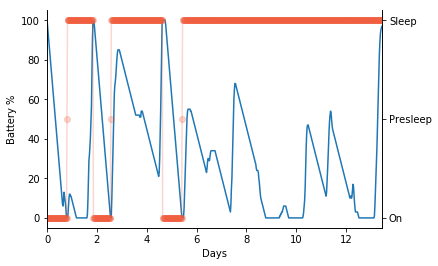

In [7]:
run=8
fig, ax = plt.subplots(1)
fig.set_size_inches([6,4])
ax.plot([i['S0'][1] for i in agent.full_record[run]])
day =0
periods = 48*14#in half hours 48 periods make a full day
ax.set_xlim([day*periods,day*periods+periods])
ax2 = ax.twinx()
ax2.plot([i['S0'][0] for i in agent.full_record[run]], color='#f05f40', alpha=0.25, marker='o')
ax2.set_yticks([0,1,2])
ax2.set_yticklabels(['On','Presleep','Sleep'])
ax.set_ylabel('Battery %')
ax.set_xticklabels([int(x/48) for x in ax.get_xticks()])
ax.set_xlabel('Days')
sns.despine(top=True, right=False)
fig.savefig('Single_node_solar_simulation.png', format ='png')